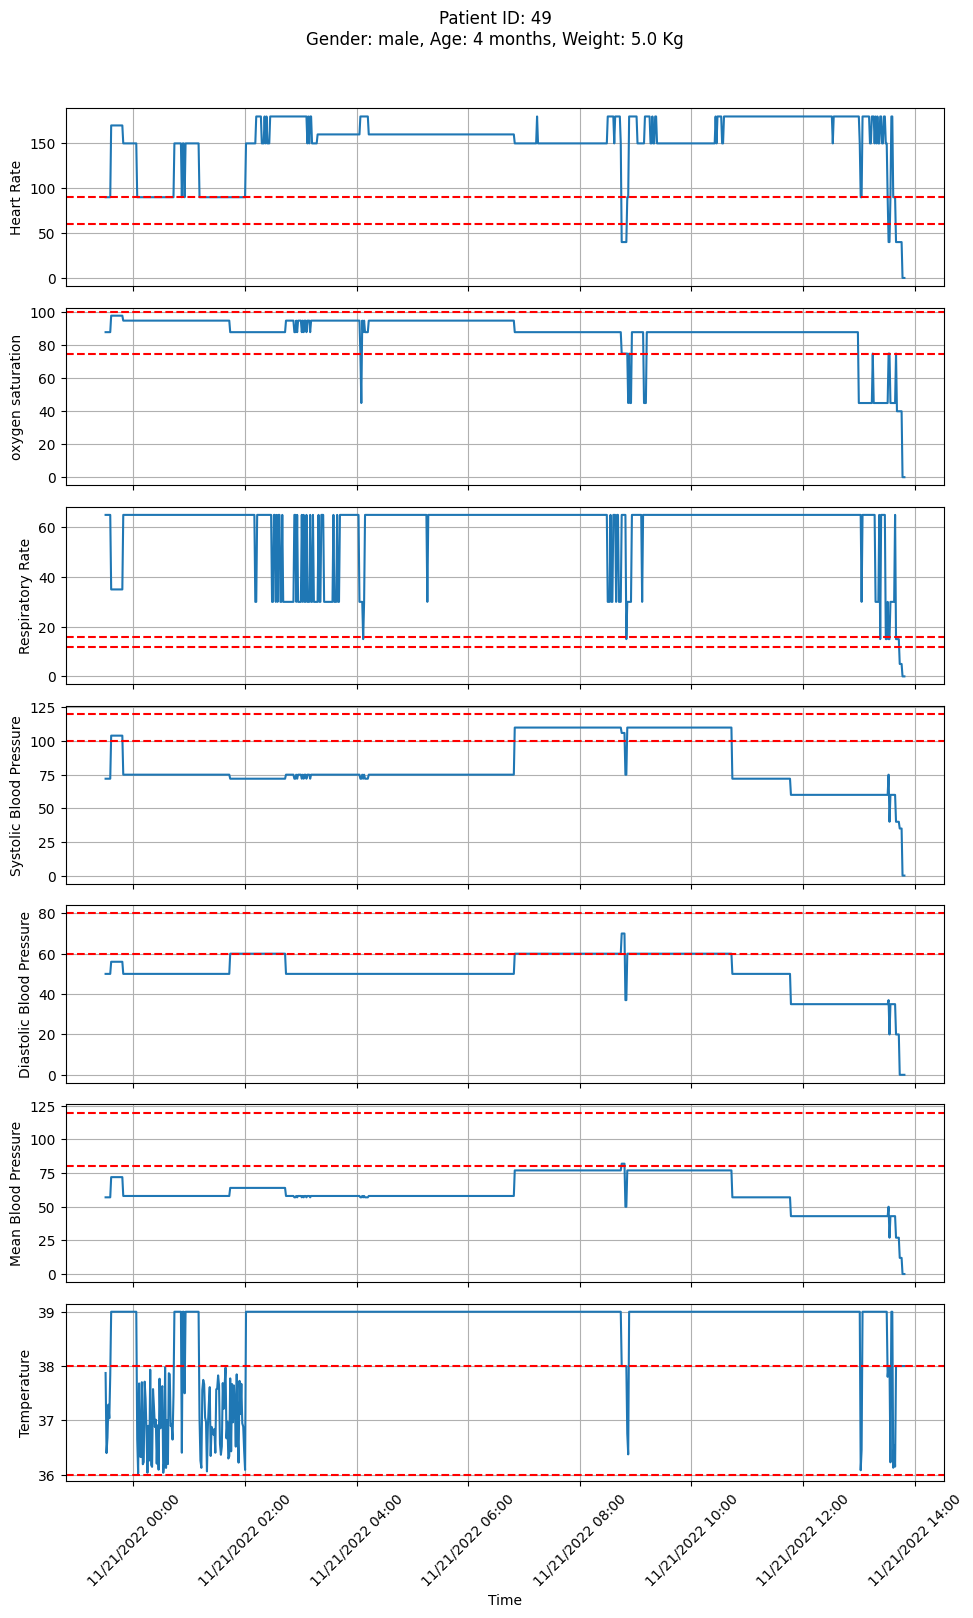

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/Users/nargeshosseinzadeh/Downloads/Post-operative patient dead.csv')

thresholds = {
    'Heart Rate': (60, 90),
    'Respiratory Rate': (12, 16),
    'Systolic Blood Pressure': (100, 120),
    'Diastolic Blood Pressure': (60, 80),
    'oxygen saturation': (75, 100),
    'Mean Blood Pressure': (80, 120),
    'Temperature' : (36,38)
}

# Convert 'Hour event(seconds)' column to datetime format with specific date format
#data['Hour event (seconds)'] = pd.to_datetime(data['Hour event (seconds)'], format='%m/%d/%y %H:%M')
data['Hour event (seconds)'] = pd.to_datetime(data['Hour event (seconds)'], format='%Y-%m-%d %H:%M:%S')

# Group the data by 'No. Patients' column
grouped_data = data.groupby('No. Patients')

# Iterate through each patient group
for patient_id, patient_data in grouped_data:
    # Extract patient information
    gender = patient_data['Genero'].iloc[0]
    age = patient_data['Age'].iloc[0]
    weight = patient_data['Weight (Kg)'].iloc[0]

    # Create a figure and subplots for the patient
    fig, axs = plt.subplots(7, 1, figsize=(10, 15), sharex=True)

    # Iterate through each vital sign and create subplots
    vital_signs = ['Heart Rate', 'oxygen saturation', 'Respiratory Rate',
                   'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Mean Blood Pressure', 'Temperature']

    for i, vital_sign in enumerate(vital_signs):
        axs[i].plot(patient_data['Hour event (seconds)'], patient_data[vital_sign])
        axs[i].set_ylabel(vital_sign)
        axs[i].grid(True)
        if vital_sign in thresholds:
          lower_threshold, upper_threshold = thresholds[vital_sign]
          axs[i].axhline(y=lower_threshold, color='red', linestyle='--', label=f'Lower Threshold ({lower_threshold})')
          axs[i].axhline(y=upper_threshold, color='red', linestyle='--', label=f'Upper Threshold ({upper_threshold})')        

    # Set common labels and title for the entire plot
    plt.xlabel('Time')
    plt.suptitle(f'Patient ID: {patient_id}\nGender: {gender}, Age: {age}, Weight: {weight} Kg', y=1.02)

    # Format the x-axis to display date and time
    date_format = DateFormatter("%m/%d/%Y %H:%M")
    axs[-1].xaxis.set_major_formatter(date_format)
    axs[-1].xaxis_date()

    # Save or display the plot
    plt.tight_layout()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.savefig(f'POPDpatient_{patient_id}_plot.png')  # Save the plot with patient ID in the filename
    plt.show()  # Use plt.show() if you want to display the plot instead of saving it
